# • Notebook “DAY 12 (Pivot Tables)" -

# Pivot Tables-

In [20]:
import numpy as np 
import pandas as pd
import seaborn as sns



In [19]:
df=sns.load_dataset('tips')  #loading a dataset 'tips'
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [27]:
#finding the average of bill of smoker male & smoker female-

df.groupby(['sex','smoker'],observed=True)[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [36]:
#creating a pivot table as same as above condition-

df.pivot_table(index='sex',columns='smoker',values='total_bill',observed=True)  #default - 'mean'


smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [56]:
#Using aggregation() function-

df.pivot_table(index='sex',columns='smoker',values='total_bill',observed=True,aggfunc=['min','max','sum','std','mean'])
#aggfunc()- allows to perform specific operation like- mean/sum/max/min etc.


min          max             sum                std            \
smoker   Yes    No    Yes     No      Yes       No       Yes        No   
sex                                                                      
Male    7.25  7.51  50.81  48.33  1337.07  1919.75  9.911845  8.726566   
Female  3.07  7.25  44.30  35.83   593.27   977.68  9.189751  7.286455   

             mean             
smoker        Yes         No  
sex                           
Male    22.284500  19.791237  
Female  17.977879  18.105185

In [75]:
#Multi-dimensional pivot table with multiple index/columns-
df.pivot_table(index=['sex','smoker'],columns=['day','time'],observed=True,aggfunc={'size':'mean','tip':'max','total_bill':'sum'})

size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71    NaN  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73    NaN    NaN   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53    NaN  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                       
day                       Sat     Sun  
time           Dinner  Dinner  Dinner  
sex    smoker                          
Male   Yes     129.46  589.62  392.12  
       No       34.95  637.73  877.34  
Female Yes      48.80  304.00   66.16  
       No       22.75  247.05  291.54

In [74]:
# Pivot table with Margins Only-

df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',observed=True,margins=True)

#margins() function create a new column and row which is sum of given aggregations.

smoker      Yes       No      All
sex                              
Male    1337.07  1919.75  3256.82
Female   593.27   977.68  1570.95
All     1930.34  2897.43  4827.77

In [139]:
expense=pd.read_csv("C:\\Users\\Prince Chandravat\\Downloads\\expense_data.csv")
expense.head()

Date               Account        Category  Subcategory  \
0  3/2/2022 10:11  CUB - online payment            Food          NaN   
1  3/2/2022 10:11  CUB - online payment           Other          NaN   
2  3/1/2022 19:50  CUB - online payment            Food          NaN   
3  3/1/2022 18:56  CUB - online payment  Transportation          NaN   
4  3/1/2022 18:22  CUB - online payment            Food          NaN   

               Note    INR Income/Expense  Note.1  Amount Currency  Account.1  
0           Brownie   50.0        Expense     NaN    50.0      INR       50.0  
1  To lended people  300.0        Expense     NaN   300.0      INR      300.0  
2            Dinner   78.0        Expense     NaN    78.0      INR       78.0  
3             Metro   30.0        Expense     NaN    30.0      INR       30.0  
4            Snacks   67.0        Expense     NaN    67.0      INR       67.0

In [140]:
category=expense['Category'].value_counts()
category

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [87]:
expense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [90]:
pd.to_datetime(expense['Date'])

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
276   2021-11-21 13:30:00
Name: Date, Length: 277, dtype: datetime64[ns]

In [148]:
expense['Date']=pd.to_datetime(expense['Date'])

In [149]:
expense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [151]:
expense['month']=expense['Date'].dt.month_name()

In [152]:
expense.head()

Date               Account        Category  Subcategory  \
0 2022-03-02 10:11:00  CUB - online payment            Food          NaN   
1 2022-03-02 10:11:00  CUB - online payment           Other          NaN   
2 2022-03-01 19:50:00  CUB - online payment            Food          NaN   
3 2022-03-01 18:56:00  CUB - online payment  Transportation          NaN   
4 2022-03-01 18:22:00  CUB - online payment            Food          NaN   

               Note    INR Income/Expense  Note.1  Amount Currency  Account.1  \
0           Brownie   50.0        Expense     NaN    50.0      INR       50.0   
1  To lended people  300.0        Expense     NaN   300.0      INR      300.0   
2            Dinner   78.0        Expense     NaN    78.0      INR       78.0   
3             Metro   30.0        Expense     NaN    30.0      INR       30.0   
4            Snacks   67.0        Expense     NaN    67.0      INR       67.0   

   month  
0  March  
1  March  
2  March  
3  March  
4  March

In [161]:
# Sum of INR per category per month with missing values filled
expense.pivot_table(index='month', columns='Category', values='INR', aggfunc='sum',fill_value=0)

Category  Allowance  Apparel  Beauty  Education     Food   Gift  Household  \
month                                                                        
December    11000.0   2590.0   196.0        0.0  6440.72    0.0     4800.0   
February        0.0    798.0     0.0        0.0  5579.85    0.0     2808.0   
January      1000.0      0.0     0.0     1400.0  9112.51    0.0     4580.0   
March           0.0      0.0     0.0        0.0   195.00    0.0        0.0   
November     2000.0      0.0     0.0        0.0  3174.40  115.0        0.0   

Category    Other  Petty cash  Salary  Self-development  Social Life  \
month                                                                  
December   1790.0         0.0     0.0             400.0       513.72   
February  20000.0         0.0     0.0               0.0      1800.00   
January   13178.0         0.0  8000.0               0.0       200.00   
March       900.0         0.0     0.0               0.0         0.00   
November   2000.0         3.0     0.0               0.0         0.00   

Category  Transportation  
month                     
December           914.0  
February          5078.8  
January           2850.0  
March               30.0  
November           331.0

<Axes: xlabel='month'>

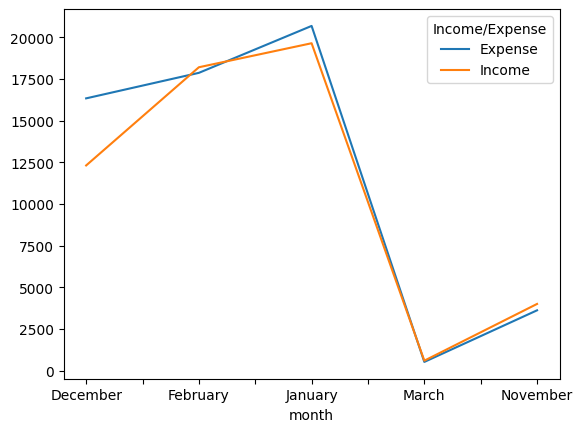

In [162]:
#Creating a graph using plot of Income/Expense

expense.pivot_table(index='month', columns='Income/Expense', values='INR', aggfunc='sum',fill_value=0).plot()

In [163]:
#Reading Csv file for some practice of Pivot table-

data=pd.read_csv("C:\\Users\\Prince Chandravat\\Downloads\\sample_pivot_data.csv")
data.head(2)

Region Product Month  Sales
0  North       A   Jan    200
1  South       A   Jan    150

In [ ]:
#Q1- Create a pivot table to show total sales by region and product.

data.pivot_table(index='Region',columns='Product',values='Sales',aggfunc='sum')

In [ ]:
#Q2- Show average sales by month and region using a pivot table.

data.pivot_table(index='Month',columns='Region',values='Sales',aggfunc='mean')

In [ ]:
#Q3- Count the number of transactions by product and month.

data.pivot_table(index='Month',columns='Product',values='Sales',aggfunc='count',fill_value=0)

In [ ]:
#Q4- Display total sales by product and region in a pivot table.

data.pivot_table(index='Product',columns='Region',values='Sales',aggfunc='sum')

In [ ]:
#Q5- Create a pivot table of sales by region and product, and replace missing values with 0.

data.pivot_table(index='Product',columns='Region',values='Sales',fill_value=0)

In [ ]:
#Q6- Create a multi-level pivot table with month and region as index, and product as columns.

data.pivot_table(index=['Month','Region'],columns='Product')

In [ ]:
#Q7- Add grand totals for rows and columns in a pivot table using margins.

data.pivot_table(index='Product',columns='Region',values='Sales',aggfunc='sum',fill_value=0.,margins=True)

In [ ]:
#Q8- Create a pivot table showing minimum and maximum sales by product.

data.pivot_table(index='Product',values='Sales',aggfunc='mean')

In [164]:
#Q9- Identify which month had the highest average sales per product using a pivot table.

data.pivot_table(index='Product',columns='Month',values='Sales',aggfunc='mean')

Month           Feb         Jan
Product                        
A        230.000000  181.666667
B        250.000000  285.000000
C        163.333333         NaN